# Sensors hourly dataset extraction

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the sensors dataset into hourly resolutions. The output is one file per catchemnt (similar to the CAMELS-CH), with 5 columns: date, ec_sensor(µS/cm), pH_sensor(-), temp_sensor(°C) & O2C_sensor(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* warnings
* numpy
* os
* pandas=2.1.3
* glob
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* All the physical data provided from BAFU ("phys_daten_BAFU")


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* BAFU. Federal Office for the Environment, Switzerland. https://www.bafu.admin.ch/bafu/en/home.html (last access: 20 Sep 2024).
## Observations
* None

# Import modules

In [1]:
import pandas as pd
import tqdm as tqdm
import os
import glob
import warnings

# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."

# Suppress all warnings
warnings.filterwarnings("ignore")

# Path to where the sensors data are stored
path_sensors = r"C:\Users\nascimth\Documents\data\CAMELS_CH_Chem\data\phys_daten_BAFU\phys_daten_BAFU\\"

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = r"results\Dataset\stream_water_chemistry\timeseries"

# Set the directory:
os.chdir(PATH)

# Import data

In [4]:
# Full dataset
filenames = glob.glob(path_sensors + "*.csv")
len(filenames)

423

* Electric conductivity

In [5]:
# Define the two specific words you want to filter for
word1 = 'Elektrische'
word2 = 'Stundenmittel'

# Filter CSV files based on whether their names contain both words
electric_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
len(electric_filenames)

19

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH)
* NADUF: 2046, 2044 and 2045 (not BAFU).

* pH

In [6]:
# Define the two specific words you want to filter for
word1 = 'pH'
word2 = 'Stundenmittel'

# Filter CSV files based on whether their names contain both words
ph_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
ph_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_pH-Wert_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_pH-Wert_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_pH-Wert_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_pH-Wert_Stundenmittel_1986-01-29_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_pH-Wert_Stundenmittel_1978-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_pH-Wert_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU

Here we have only 2622 (2243). 

* Temperature

In [7]:
# Define the two specific words you want to filter for
word1 = 'Wassertemperatur'
word2 = 'Stundenmittel'

# Filter CSV files based on whether their names contain both words
temperature_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
temperature_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2011_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2019_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2029_Wassertemperatur_Stundenmittel_1974-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\

* BAFU: 2290 is located elsewhere (2290_St-Sulpice_Areuse_Eawag_CAMELS_CH), 2176 (Kanton ZH) is located elsewhere.

* NADUF: 2046, 2044, 2045 (not BAFU).

* 2622 (2243) is included in both files here for temperature, but suposelly is the same (ask Ursi again). 

* 2190, 2424 and 2425 are included here, but not in CAMELS or in the original list from Ursi (88 files in Hydronetz), but are in the excel and files. 

* This give us a total of 90 stations with temperature, which is the same number of total stations. 

* Oxygen

In [8]:
# Define the two specific words you want to filter for
word1 = 'Sauerstoff'
word2 = 'Stundenmittel'

# Filter CSV files based on whether their names contain both words
oxygen_filenames = [file for file in filenames if (word1 in file) and (word2 in file)]
oxygen_filenames

['C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2009_Sauerstoff_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2016_Sauerstoff_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2018_Sauerstoff_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2044_Sauerstoff_Stundenmittel_1986-01-29_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2068_Sauerstoff_Stundenmittel_1978-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAFU\\phys_daten_BAFU\\2085_Sauerstoff_Stundenmittel_1976-01-01_2022-12-31.csv',
 'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\phys_daten_BAF

Here we have only 2622 (2243). 

### Aggregation

* We have 90 stations in total.
* The 88 from the temperature list + 2290 + 2176.
* We first aggregate the data available from BAFU, then the 2 extra stations.

#### - BAFU

In [9]:
columns_names = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]

for filename in tqdm.tqdm(temperature_filenames):

    hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='H'), columns=columns_names)
    
    network_filename = pd.read_csv(filename, skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                      "Wert"])
    network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
    network_filename = network_filename[["date", "Wert"]]
    network_filename.set_index("date", inplace = True)
    
    namestation = os.path.basename(filename)
    namestation = namestation.split("_", 5)[0]
    hourly_timeseries["temp_sensor"] = network_filename["Wert"]
    
    
    ###################################################
    ##  pH
    
    filenames = ph_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:        
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        hourly_timeseries["pH_sensor"] = network_filename["Wert"]      
    except: 
        1+1
        
    ###################################################
    ##  electric_cond(µS/cm)
    
    filenames = electric_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:       
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        hourly_timeseries["ec_sensor"] = network_filename["Wert"]
    except:
        1+1
    ###################################################
    ##  oxygen_conc(mg/l)
    
    filenames = oxygen_filenames.copy()
    # List to store filenames containing the number
    matching_filenames = []

    # Iterate over filenames and check if the number is present in the first 4 characters of the file name
    for filename in filenames:
        # Extract the file name (without the path)
        file_name_only = filename.split("\\")[-1]
        # Extract the first 4 characters of the file name
        first_four_characters = file_name_only[:4]
        # Check if the number is present in the first 4 characters
        if namestation in first_four_characters:
            matching_filenames.append(filename)
    try:      
        network_filename = pd.read_csv(matching_filenames[0], skiprows=8, delimiter = ";", encoding='latin-1', usecols=["Zeitstempel", 
                                                                                                          "Wert"])
        network_filename["date"] = pd.to_datetime(network_filename["Zeitstempel"], format='%Y-%m-%d %H:%M:%S')
        network_filename = network_filename[["date", "Wert"]]
        network_filename.set_index("date", inplace = True)
        network_filename['Wert'] = pd.to_numeric(network_filename['Wert'], errors='coerce')

        hourly_timeseries["O2C_sensor"] = network_filename["Wert"]  
    except: 
        1+1
    
    hourly_timeseries.index.name = "date"
    
    hourly_timeseries = hourly_timeseries.round(2)

    hourly_timeseries.to_csv(PATH_OUTPUT + "/hourly/camels_ch_chem_hourly_"+namestation+".csv", encoding='latin')

100%|██████████| 88/88 [02:53<00:00,  1.97s/it]


#### - 2 extra stations
Station 2176

In [10]:
namestation = "2176"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='H'), columns=columns_names)

path_2176 = r'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\Kanton ZH\S2176\S2176_Wassertemperatur _Stundenmittel.txt'
network_2176 = pd.read_csv(path_2176, skiprows=2, delimiter = "\t", encoding='latin-1')
network_2176["date"] = network_2176["Datum"] + " "  + network_2176["Zeit"]
network_2176["date"] = pd.to_datetime(network_2176["date"], format='%d.%m.%Y %H:%M:%S')
network_2176.set_index("date", inplace = True)
network_2176 = network_2176[["Messwert"]]
hourly_timeseries["temperature(°C)"] = network_2176["Messwert"]

hourly_timeseries.index.name = "date"
    
hourly_timeseries = hourly_timeseries.round(2)

# Rename the names of the columns
hourly_timeseries.columns = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]

hourly_timeseries.to_csv(PATH_OUTPUT + "/hourly/camels_ch_chem_hourly_"+namestation+".csv", encoding='latin')

hourly_timeseries

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01 00:00:00,NaN,NaN,NaN,NaN
1981-01-01 01:00:00,NaN,NaN,NaN,NaN
1981-01-01 02:00:00,NaN,NaN,NaN,NaN
1981-01-01 03:00:00,NaN,NaN,NaN,NaN
1981-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-30 20:00:00,3.03,NaN,NaN,NaN
2020-12-30 21:00:00,3.00,NaN,NaN,NaN
2020-12-30 22:00:00,2.98,NaN,NaN,NaN


Station 2290

In [11]:
namestation = "2290"

columns_names = ["temperature(°C)", "pH(-)", "electric_cond(µS/cm)", "oxygen_conc(mg/l)"]
hourly_timeseries = pd.DataFrame(index = pd.date_range('01-01-1981','12-31-2020', freq='H'), columns=columns_names)

############ Electrical conductivity
path_2290_EC = r'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\S2290\S2290_St-Sulpice-Areuse_LF_20090425-20221231.CSV'

network_2290_EC = pd.read_csv(path_2290_EC, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_EC = network_2290_EC[["Datum.1", "Uhrzeit.1", "LF Stundenmittel [µS/cm]"]]

# Drop rows with NaN values in the specific column
network_2290_EC.dropna(subset=['Datum.1'], inplace=True)

network_2290_EC["date"] = network_2290_EC["Datum.1"] + " "  + network_2290_EC["Uhrzeit.1"]
network_2290_EC["date"] = pd.to_datetime(network_2290_EC["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_EC.set_index("date", inplace = True)

############ Temperature
path_2290_T = r'C:\\Users\\nascimth\\Documents\\data\\CAMELS_CH_Chem\\data\\S2290\S2290_St-Sulpice-Areuse_T_20090425-20221231.CSV'

network_2290_T = pd.read_csv(path_2290_T, skiprows=13, delimiter = ";", encoding='latin-1')

network_2290_T = network_2290_T[["Datum.1", "Uhrzeit.1", "T Stundenmittel [°C]"]]

# Drop rows with NaN values in the specific column
network_2290_T.dropna(subset=['Datum.1'], inplace=True)

network_2290_T["date"] = network_2290_T["Datum.1"] + " "  + network_2290_T["Uhrzeit.1"]
network_2290_T["date"] = pd.to_datetime(network_2290_T["date"], format='%d.%m.%Y %H:%M:%S')
network_2290_T.set_index("date", inplace = True)

############################################################################
network_2290_EC = network_2290_EC[["LF Stundenmittel [µS/cm]"]]
hourly_timeseries["electric_cond(µS/cm)"] = network_2290_EC["LF Stundenmittel [µS/cm]"]

network_2290_T = network_2290_T[["T Stundenmittel [°C]"]]
hourly_timeseries["temperature(°C)"] = network_2290_T["T Stundenmittel [°C]"]

hourly_timeseries.index.name = "date"

# There are some non-numeric things in the columns, instead of NaNs
hourly_timeseries = hourly_timeseries.apply(pd.to_numeric, errors='coerce')

hourly_timeseries = hourly_timeseries.round(2)

# Rename the names of the columns
hourly_timeseries.columns = ["temp_sensor", "pH_sensor", "ec_sensor", "O2C_sensor"]

hourly_timeseries.to_csv(PATH_OUTPUT + "/hourly/camels_ch_chem_hourly_"+namestation+".csv", encoding='latin')

hourly_timeseries

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01 00:00:00,NaN,NaN,NaN,NaN
1981-01-01 01:00:00,NaN,NaN,NaN,NaN
1981-01-01 02:00:00,NaN,NaN,NaN,NaN
1981-01-01 03:00:00,NaN,NaN,NaN,NaN
1981-01-01 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-12-30 20:00:00,7.29,NaN,411.2,NaN
2020-12-30 21:00:00,7.28,NaN,410.3,NaN
2020-12-30 22:00:00,7.27,NaN,408.2,NaN


- Remarks

    - 87 stations from BAFU in inverntarlist 

    - 2190, 2424 and 2425 are included here, but not in the internarlist/CAMELS-CH (moved to another folder)

    - 2403, (empty).
    
    - We need to merge 2622 into 2243.

In [14]:
# Merging 2622 into 2243
bafu_2622_hourly = pd.read_csv(r"results\\Dataset\stream_water_chemistry\\timeseries\hourly\2190_2424_2425_2243\camels_ch_chem_hourly_2622.csv", encoding='latin')
bafu_2622_hourly.set_index("date", inplace=True)
bafu_2622_hourly

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01 00:00:00,4.26,7.66,303.9,8.97
1981-01-01 01:00:00,4.24,7.66,303.1,8.97
1981-01-01 02:00:00,4.23,7.65,302.4,8.98
1981-01-01 03:00:00,4.22,7.65,301.9,9.02
1981-01-01 04:00:00,4.23,7.66,301.4,9.06
...,...,...,...,...
2020-12-30 20:00:00,NaN,NaN,NaN,NaN
2020-12-30 21:00:00,NaN,NaN,NaN,NaN
2020-12-30 22:00:00,NaN,NaN,NaN,NaN


In [17]:
# Merging 2622 into 2243

bafu_2243_hourly = pd.read_csv(r"results\Dataset\stream_water_chemistry\timeseries\hourly\2190_2424_2425_2243\camels_ch_chem_hourly_2243.csv", encoding='latin')
bafu_2243_hourly.set_index("date", inplace=True)
bafu_2243_hourly

,temp_sensor,pH_sensor,ec_sensor,O2C_sensor
date,,,,
1981-01-01 00:00:00,4.26,NaN,NaN,NaN
1981-01-01 01:00:00,4.24,NaN,NaN,NaN
1981-01-01 02:00:00,4.23,NaN,NaN,NaN
1981-01-01 03:00:00,4.22,NaN,NaN,NaN
1981-01-01 04:00:00,4.23,NaN,NaN,NaN
...,...,...,...,...
2020-12-30 20:00:00,6.50,NaN,NaN,NaN
2020-12-30 21:00:00,6.49,NaN,NaN,NaN
2020-12-30 22:00:00,6.50,NaN,NaN,NaN


<Axes: xlabel='date'>

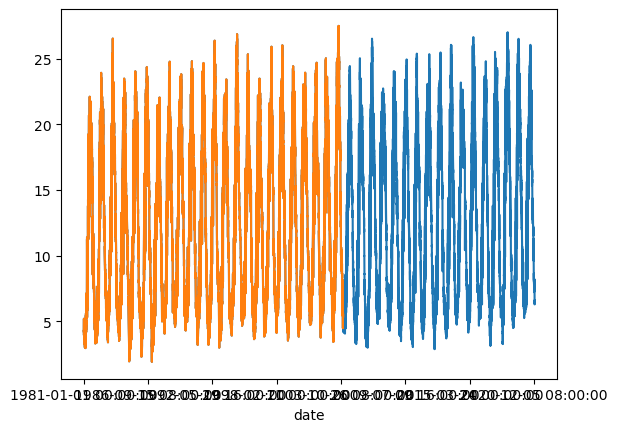

In [18]:
bafu_2243_hourly["temp_sensor"].plot()
bafu_2622_hourly["temp_sensor"].plot()

In [19]:
bafu_2243_hourly["ec_sensor"] = bafu_2622_hourly["ec_sensor"]
bafu_2243_hourly["pH_sensor"] = bafu_2622_hourly["pH_sensor"]
bafu_2243_hourly["O2C_sensor"] = bafu_2622_hourly["O2C_sensor"]

In [20]:
bafu_2243_hourly.to_csv(r"results\\Dataset\stream_water_chemistry\\timeseries\hourly/camels_ch_chem_hourly_hourly_2243.csv", encoding='latin')

# End